### Import Libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Import original dataset dari kaggle (https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw)

In [34]:
#cars_dataset
cars_dataset = pd.read_csv('cars_dataset.csv')
cars_dataset.head()



,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


In [37]:
#head with unique values
cars_dataset.head(10)




,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi
5,A1,2016,13900,Automatic,32260,Petrol,30.0,58.9,1.4,audi
6,A6,2016,13250,Automatic,76788,Diesel,30.0,61.4,2.0,audi
7,A4,2016,11750,Manual,75185,Diesel,20.0,70.6,2.0,audi
8,A3,2015,10200,Manual,46112,Petrol,20.0,60.1,1.4,audi
9,A1,2016,12000,Manual,22451,Petrol,30.0,55.4,1.4,audi


In [38]:
#datatype
cars_dataset.dtypes


model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
Make             object
dtype: object

### import ford.csv


In [3]:
df = pd.read_csv("Ford.csv", delimiter = ";")
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150.0,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150.0,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150.0,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145.0,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145.0,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17959,Fiesta,2016,7999,Manual,31348,Petrol,125.0,54.3,1.2
17960,B-MAX,2017,8999,Manual,16700,Petrol,150.0,47.1,1.4
17961,B-MAX,2014,7499,Manual,40700,Petrol,30.0,57.7,1.0
17962,Focus,2015,9999,Manual,7010,Diesel,20.0,67.3,1.6


In [4]:
#show model and price only
df_model = df[['model', 'price',"mpg","tax","engineSize","mileage"]]

In [5]:
#find df_model mean
df_model

,model,price,mpg,tax,engineSize,mileage
0,Fiesta,12000,57.7,150.0,1.0,15944
1,Focus,14000,57.7,150.0,1.0,9083
2,Focus,13000,57.7,150.0,1.0,12456
3,Fiesta,17500,40.3,145.0,1.5,10460
4,Fiesta,16500,48.7,145.0,1.0,1482
...,...,...,...,...,...,...
17959,Fiesta,7999,54.3,125.0,1.2,31348
17960,B-MAX,8999,47.1,150.0,1.4,16700
17961,B-MAX,7499,57.7,30.0,1.0,40700
17962,Focus,9999,67.3,20.0,1.6,7010


### Data Preprocessing

In [6]:
#find each price mean
df_model = df_model.groupby('model').mean()

In [7]:
df_model 

,price,mpg,tax,engineSize,mileage
model,,,,,
B-MAX,8287.526761,55.678592,90.957746,1.316901,28131.735211
C-MAX,9914.567219,59.508840,71.712707,1.407366,28456.979742
EcoSport,12499.268591,53.093526,136.342957,1.108924,16469.806649
Edge,22810.500000,46.150962,156.899038,2.000000,21769.495192
Escort,3000.000000,34.400000,265.000000,1.800000,50000.000000
Fiesta,10196.862569,60.980201,100.861806,1.098032,21679.115619
Focus,13185.882956,60.089385,111.156277,1.361421,23735.274412
Fusion,2555.812500,45.393750,183.750000,1.487500,65888.812500
Galaxy,17841.872807,53.347807,145.855263,1.978070,32994.956140


In [8]:
#save to xlsx
df_model.to_excel("ford_model.xlsx")

<AxesSubplot:xlabel='tax', ylabel='price'>

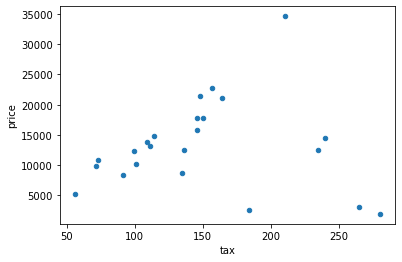

In [10]:
#scatter engineSize vs price
df_model.plot(kind='scatter', x='tax', y='price')

In [12]:
# Split X and y
X = df.drop(['model', 'price'], axis=1)
y = df['price']

In [13]:
df.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.645450,-0.718751,0.300468,-0.021489,-0.139217
price,0.645450,1.000000,-0.530678,0.406963,-0.346564,0.411181
mileage,-0.718751,-0.530678,1.000000,-0.260718,0.120227,0.215007
tax,0.300468,0.406963,-0.260718,1.000000,-0.502952,0.184313
mpg,-0.021489,-0.346564,0.120227,-0.502952,1.000000,-0.260534
engineSize,-0.139217,0.411181,0.215007,0.184313,-0.260534,1.000000


In [14]:
# Create dummies for categorical variables

# subset all categorical variables
cars_categorical = X.select_dtypes(include=['object'])
# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
# drop categorical variables 
X = X.drop(list(cars_categorical.columns), axis=1)
# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)
X

,year,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150.0,57.7,1.0,0,0,0,0,0,1
1,2018,9083,150.0,57.7,1.0,1,0,0,0,0,1
2,2017,12456,150.0,57.7,1.0,1,0,0,0,0,1
3,2019,10460,145.0,40.3,1.5,1,0,0,0,0,1
4,2019,1482,145.0,48.7,1.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
17959,2016,31348,125.0,54.3,1.2,1,0,0,0,0,1
17960,2017,16700,150.0,47.1,1.4,1,0,0,0,0,1
17961,2014,40700,30.0,57.7,1.0,1,0,0,0,0,1
17962,2015,7010,20.0,67.3,1.6,1,0,0,0,0,0


In [15]:
# Scale the features

# Store column names since the column names will be lost after scaling
cols = X.columns

# Scale the features and convert it back to a dataframe
X = pd.DataFrame(scale(X))

# Write in the column names again
X.columns = cols
X.columns

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Electric', 'fuelType_Hybrid',
       'fuelType_Other', 'fuelType_Petrol'],
      dtype='object')

### Applied Linear Regression menggunakan sklearn

In [16]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=125)

In [17]:
# Instantiate the model
lm = LinearRegression()

# Fit the model
lm.fit(X_train, y_train)

# Make prediction
y_pred = lm.predict(X_test)

# Performance metrics
lr_r2= r2_score(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)

# Show the metrics
print("Linear Regression R2: ", lr_r2)
print("Linear Regression MAE: ", lr_mae)

Linear Regression R2:  0.7500172386036711
Linear Regression MAE:  1781.2119117335105


In [18]:
#melakukan analisis regresi
import statsmodels.api as sm
from scipy import stats

#summary
X = sm.add_constant(X_train)
result = sm.OLS(y_train, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     3879.
Date:                Sat, 08 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:49:58   Log-Likelihood:            -1.3202e+05
No. Observations:               14371   AIC:                         2.641e+05
Df Residuals:                   14359   BIC:                         2.642e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.22

## Menghapus Variabel yang memiliki p value lebih dari alpha (0,05)

In [19]:
# Split X and y
X = df.drop(['model', 'price', 'tax'], axis=1)
y = df['price']

In [20]:
# Create dummies for categorical variables

# subset all categorical variables
cars_categorical = X.select_dtypes(include=['object'])
# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
# drop categorical variables 
X = X.drop(list(cars_categorical.columns), axis=1)
# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)
X

,year,mileage,mpg,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,57.7,1.0,0,0,0,0,0,1
1,2018,9083,57.7,1.0,1,0,0,0,0,1
2,2017,12456,57.7,1.0,1,0,0,0,0,1
3,2019,10460,40.3,1.5,1,0,0,0,0,1
4,2019,1482,48.7,1.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
17959,2016,31348,54.3,1.2,1,0,0,0,0,1
17960,2017,16700,47.1,1.4,1,0,0,0,0,1
17961,2014,40700,57.7,1.0,1,0,0,0,0,1
17962,2015,7010,67.3,1.6,1,0,0,0,0,0


In [21]:
X = X.drop(['fuelType_Electric', 'fuelType_Other'], axis=1)
X

,year,mileage,mpg,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
0,2017,15944,57.7,1.0,0,0,0,1
1,2018,9083,57.7,1.0,1,0,0,1
2,2017,12456,57.7,1.0,1,0,0,1
3,2019,10460,40.3,1.5,1,0,0,1
4,2019,1482,48.7,1.0,0,0,0,1
...,...,...,...,...,...,...,...,...
17959,2016,31348,54.3,1.2,1,0,0,1
17960,2017,16700,47.1,1.4,1,0,0,1
17961,2014,40700,57.7,1.0,1,0,0,1
17962,2015,7010,67.3,1.6,1,0,0,0


In [22]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=125)

In [23]:
# Instantiate the model
lm = LinearRegression()

# Fit the model
lm.fit(X_train, y_train)

# Make prediction
y_pred = lm.predict(X_test)

# Performance metrics
lr_r2= r2_score(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)

# Show the metrics
print("Linear Regression R2: ", lr_r2)
print("Linear Regression MAE: ", lr_mae)

Linear Regression R2:  0.7500636883650983
Linear Regression MAE:  1779.7706552314705


In [24]:
#melakukan analisis regresi
import statsmodels.api as sm
from scipy import stats

#summary
X = sm.add_constant(X_train)
result = sm.OLS(y_train, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     5333.
Date:                Sat, 08 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:49:59   Log-Likelihood:            -1.3202e+05
No. Observations:               14371   AIC:                         2.641e+05
Df Residuals:                   14362   BIC:                         2.641e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -2.5

In [25]:
#save model with joblib
import joblib
save_model = joblib.dump(lm, 'model.pkl')
save_model

['model.pkl']

In [31]:
#print first 5 rows of X_test
y = X_test.head()
y

,year,mileage,mpg,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
6079,2016,17870,62.8,1.0,1,0,0,1
13353,2018,15158,65.7,1.0,1,0,0,1
8600,2018,5402,64.2,1.1,1,0,0,1
10006,2017,28056,60.1,2.0,1,0,0,0
4023,2018,10388,57.7,1.2,1,0,0,1


In [27]:
#predict lm
y_pred

array([ 8943.73340436, 11299.51797037, 12408.60141314, ...,
        5744.41238228, 15834.77369291,  7716.18607907])

In [28]:
#match with y_test
y_test


6079      8999
13353    11500
8600     10390
10006    14495
4023      8750
         ...  
5874     19110
4629      8498
14690     5499
14737    15999
15899     7599
Name: price, Length: 3593, dtype: int64

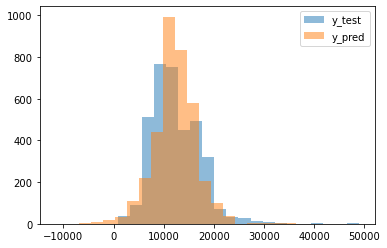

In [29]:
#make histogram of x and y
plt.hist(y_test, bins=20, alpha=0.5, label='y_test')
plt.hist(y_pred, bins=20, alpha=0.5, label='y_pred')
plt.legend(loc='upper right')
plt.show()
